# Lead Score Case Study for X Education

## Problem Statement

## 1. Data Import and Data Understanding

Import libraries and packages

In [1247]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

In [1248]:
#import data from csv file
df_lead = pd.read_csv('leads.csv')

In [1249]:
# Check the first few rows of the dataset 
pd.set_option('display.max_columns',60)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1250]:
#Shape of dataframe - No. of rows and columns
df_lead.shape

(9240, 37)

In [1251]:
#Info of data frame - different columns, their data types and null details
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1252]:
#Details of numeric columns
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

In [1253]:
# Drop any duplicate rows if present
df_lead.drop_duplicates(inplace=True)

In [1254]:
df_lead.shape

(9240, 37)

The no. of rows were same. Hence there was no duplicate present

#### 2.1 Dropping unwanted columns
We can drop columns Prospect ID and Lead Number as they are IDs/number assigned to each customer and doesn't help with analysis

In [1255]:
df_lead.drop(["Prospect ID","Lead Number"], axis = 1, inplace = True)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 2.2 Replacing 'Select' with null values

Many of the categorical variables have a level called 'Select' which is as good as Null as no values were actually selected for these columns. Hence we will replace those with Nan

In [1256]:
df_lead.replace('Select', np.nan, inplace = True)

#### 2.3 Handling Null values

In [1257]:
# Percentage of Null values in each column
(df_lead.isnull().sum()/len(df_lead.index)*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We will drop columns with more than 45% of missing values. But the variable 'Lead Quality', which has 51.59% missing values seems to be relevant to the business. Hence we will keep it for now.

In [1258]:
cols_to_drop = ['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score']
df_lead.drop(cols_to_drop , axis = 1, inplace = True)
df_lead.shape

(9240, 29)

In [1259]:
# Values Present in Leads Quality columns
df_lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

There is a category called 'Not Sure' for Lead Quality. Hence we can impute the missing values 'Not sure' since the employee who was assigned to the lead didn't fill this because he/she could have been unsure about it.

In [1260]:
df_lead['Lead Quality'].fillna('Not Sure',inplace=True)
df_lead['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [1261]:
#Values present in Tags column
df_lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1262]:
#Replace the null values with Mode value - Will revert after reading the email
df_lead['Tags'].fillna('Will revert after reading the email',inplace=True)
df_lead['Tags'].isnull().sum()

0

In [1263]:
# Values in column - What matters most to you in choosing a course
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1264]:
# Replace the null values in 'What matters most to you in choosing a course' with mode - Better Career Prospects
df_lead['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)

In [1265]:
# Values in column - What is your current occupation
df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1266]:
# Replace the null values in 'What is your current occupation' with mode - 'Unemployed' 
df_lead['What is your current occupation'].fillna('Unemployed', inplace = True)

In [1267]:
# Values in column - Country
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1268]:
#Replace the null values in column Country with the most occuring value(mode), which is India
df_lead['Country'].fillna('India', inplace = True)
df_lead['Country'].isnull().sum()

0

In [1269]:
# Values in column - Specialization
df_lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [1270]:
# Replace the null values in column 'Specialization' with its mode - Finance Management
df_lead['Specialization'].fillna('Finance Management', inplace = True)
df_lead['Specialization'].isnull().sum()

0

In [1271]:
# Values in column - City
df_lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1272]:
#Replacing Null values with Mode - Mumbai
df_lead['City'].fillna('Mumbai', inplace = True)
df_lead['City'].isnull().sum()

0

Columns Page Views Per Visit,TotalVisits,Last Activity and Lead Source has less than 2% missing values. Hence we can remove those rows from our data set.

In [1273]:
#Deleting the rows which has negligible % of null values 

cols_to_del_rows = ['Page Views Per Visit','TotalVisits','Last Activity','Lead Source']
for col in cols_to_del_rows:
    df_lead = df_lead[~df_lead[col].isnull()]
    

In [1274]:
df_lead.shape

(9074, 29)

In [1275]:
# Check again the % of null values
(df_lead.isnull().sum()/len(df_lead.index)*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

All missing values has been handled.

In [1276]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


## 3. Data Visualization and EDA

In [1277]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### Visualising the categorical variables using Countplot

#### Visualizing Binary(Yes/No) Features

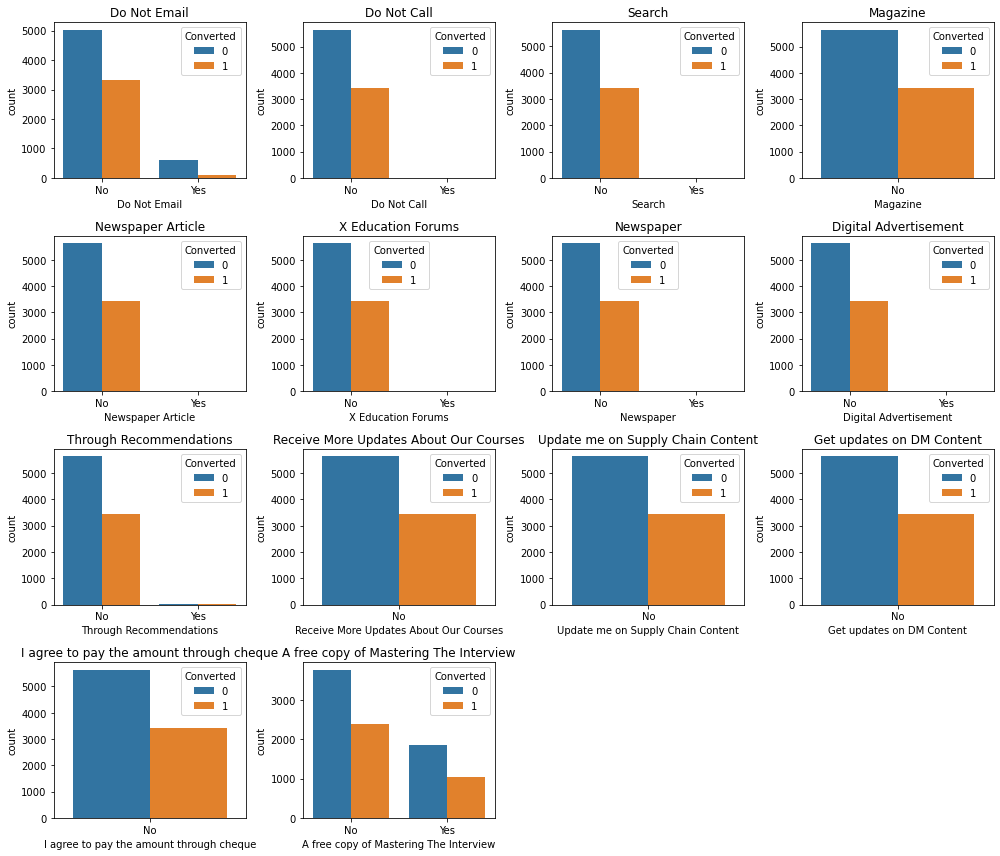

In [1278]:
#Features with Yes/No values
categorical_variables = list(df_lead.nunique()[df_lead.nunique()<=2].index)

categorical_variables.remove('Converted')
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_variables):    
    plt.subplot(4,4,i+1)
    sns.countplot(x=df_lead[col],hue='Converted',data=df_lead)
    plt.title(col)
plt.tight_layout()
plt.show()

Among these variables, there is high imbalance of data for the following ones- ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], ie. all the values are 'No'. Hence these columns can be dropped.

In [1279]:
df_lead.drop(['Do Not Call','Do Not Email', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)
df_lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,No,Modified


#### Visualising categorical variables

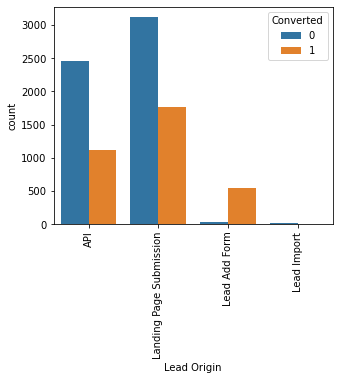

In [1280]:
# Lead Origin
plt.figure(figsize=(5,4))
s1=sns.countplot(df_lead['Lead Origin'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Inference :<br>
Landing Page Submissions and API have higher number of conversions.<br>
Lead Add From has a high conversion rate however the number of leads is less.

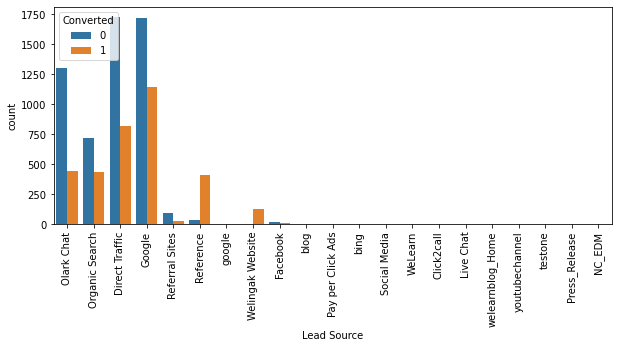

In [1281]:
#Lead Source
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Lead Source'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

There are quite a few Lead Source categories that has very less number of leads (< 1%). They all can be grouped together into a new category called 'Others'.

In [1282]:
others = df_lead['Lead Source'].value_counts(normalize=True)[df_lead['Lead Source'].value_counts(normalize=True)<0.01].index
df_lead['Lead Source']=df_lead['Lead Source'].apply(lambda x: 'Others' if x in others else x)


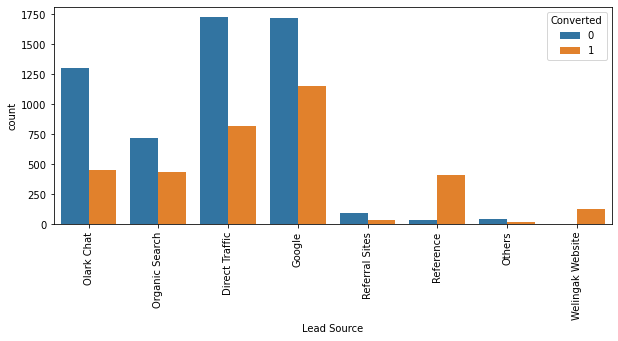

In [1283]:
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Lead Source'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Direct Traffic and Google has similar number of leads, but Google has comparatively higher conversion rate. <br>
Leads obtained by Reference has a very high chance of conversion

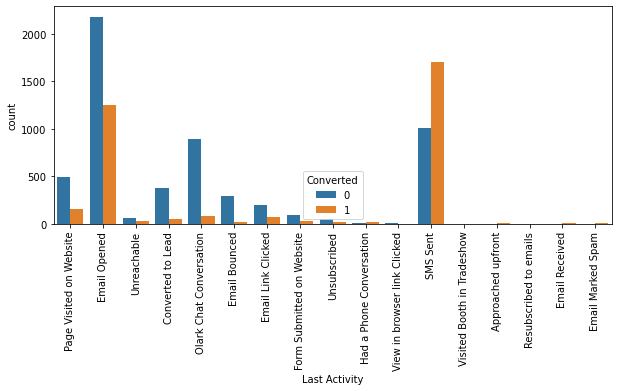

In [1284]:
#Last Activity
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Last Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

There are quite a few Last Activity categories that has very less number of leads (< 1%). They all can be grouped together into a new category called 'Others'.

In [1285]:
others = df_lead['Last Activity'].value_counts(normalize=True)[df_lead['Last Activity'].value_counts(normalize=True)<0.01].index
df_lead['Last Activity']=df_lead['Last Activity'].apply(lambda x: 'Others' if x in others else x)

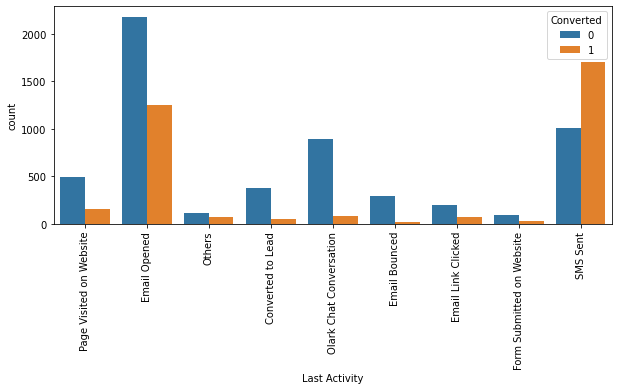

In [1286]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Last Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

Email opened has the highest number of leads. <br>
Last activity of SMS sent indicates a high chance of conversion. <br>
Olark Chat Conversation has a large number of leads but the conversion rate is too low. <br>

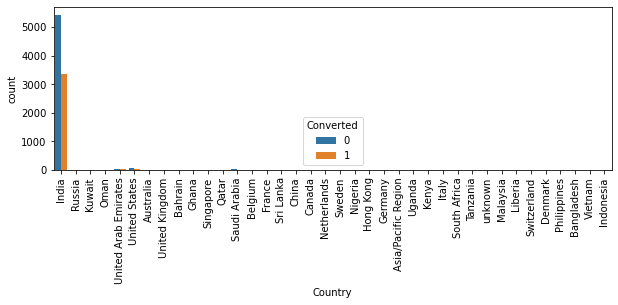

In [1287]:
#Country
plt.figure(figsize=(10,3))
s3=sns.countplot(df_lead['Country'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [1288]:
df_lead['Country'].value_counts(normalize=True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Hong Kong               0.000771
Bahrain                 0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
South Africa            0.000441
Nigeria                 0.000441
Germany                 0.000441
Kuwait                  0.000441
Canada                  0.000441
Sweden                  0.000331
China                   0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Bangladesh              0.000220
Italy                   0.000220
Belgium                 0.000220
Netherlands             0.000220
Ghana                   0.000220
Philippines             0.000220
Russia                  0.000110
Switzerland             0.000110
Vietnam   

96.8% of the rows have 'India' as Country. This shows that they is low variance for the country data and hence this column can be dropped.

In [1289]:
df_lead.drop(columns=['Country'],inplace=True)

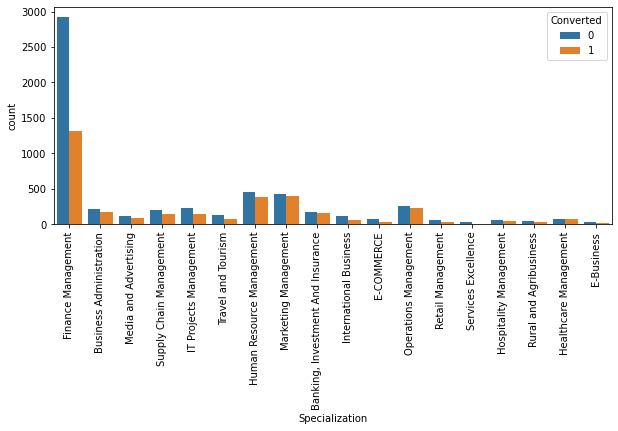

In [1290]:
#Specialization
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Specialization'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [1291]:
df_lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.467379
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

Comparatively management specialisations have a higher conversion rate. We can merge these into a single category.

In [1292]:
management = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
df_lead['Specialization']=df_lead['Specialization'].apply(lambda x: 'Management' if x in management else x)

In [1293]:
#We can also group together the categories with less than 1% leads as 'Others'
others = df_lead['Specialization'].value_counts(normalize=True)[df_lead['Specialization'].value_counts(normalize=True)<0.01].index
df_lead['Specialization']=df_lead['Specialization'].apply(lambda x: 'Others' if x in others else x)


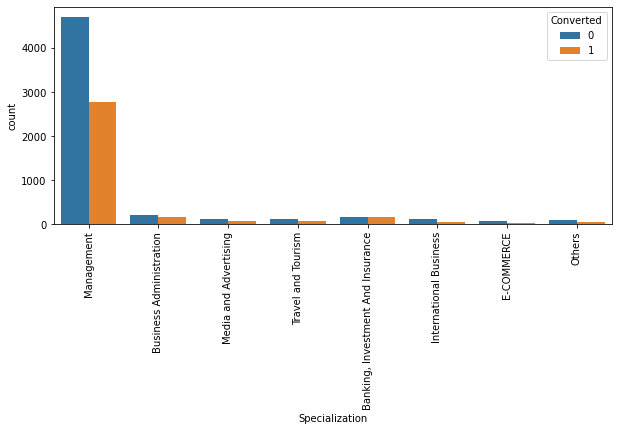

In [1294]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Specialization'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

Management Specialisations have the highest number of leads
Banking, Investment and Insurance specialisations has close to 50% conversion rate.

In [1295]:
#Rename column "What is your current occupation" to 'Occupation'
df_lead.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)

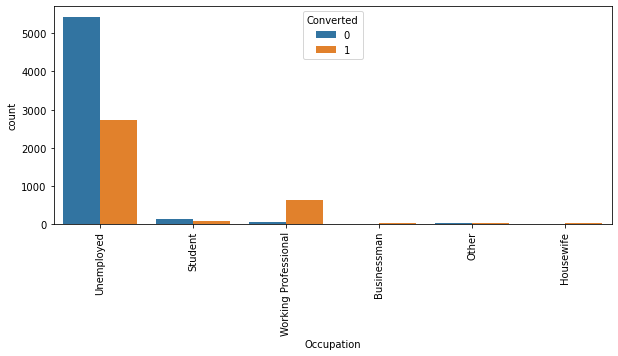

In [1296]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Occupation'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()


Inference: <br>
Leads are high among unemployed people, but the ratio of conversion is high among working professionals.

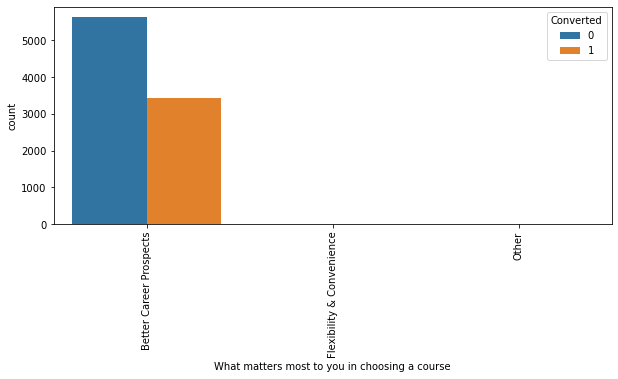

In [1297]:
#What matters most to you in choosing a course
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['What matters most to you in choosing a course'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()


In [1298]:
df_lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

In [1299]:
#More than 99% of the rows have the same value which means this feauture has low variance. Hence this column can be dropped.
df_lead.drop(columns=['What matters most to you in choosing a course'],inplace=True)

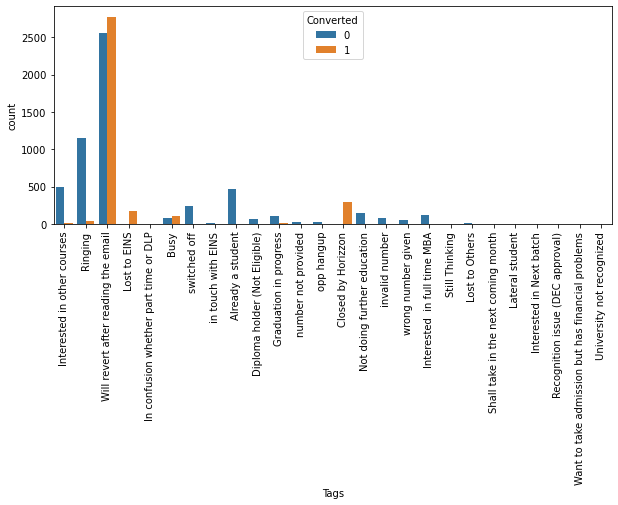

In [1300]:
#Tags
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Tags'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [1301]:
df_lead['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.588825
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number not provided                                  0.002755
in touch

In [1302]:
#We can also group together the categories with less than 1% leads as 'Others' 
others = df_lead['Tags'].value_counts(normalize=True)[df_lead['Tags'].value_counts(normalize=True)<0.01].index
df_lead['Tags']=df_lead['Tags'].apply(lambda x: 'Others' if x in others else x)


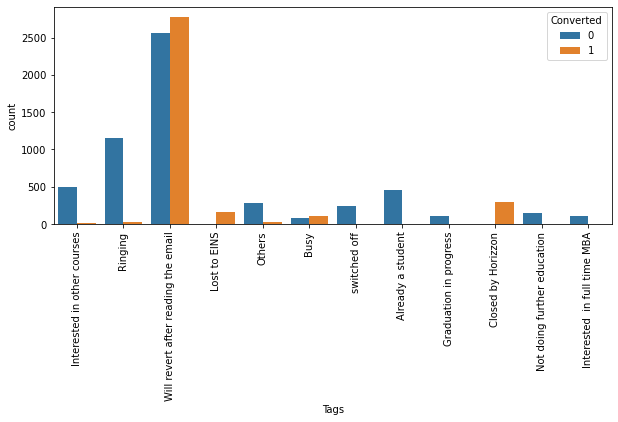

In [1303]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Tags'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

'Will revert after reading the email' has higher number of leads as well as high conversion rate. <br>
Tags - 'Lost to EINS' and 'Closed by Horizon' has close to 100% conversion rate.

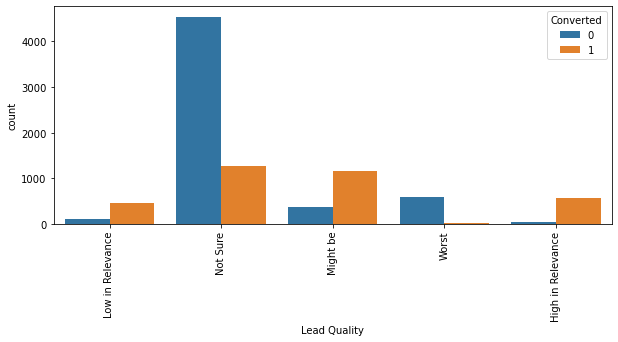

In [1304]:
#Lead Quality
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Lead Quality'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

Majority of the leads has Lead Quality as Not sure. <br>
High in Relevance leads has the highest conversion rate.

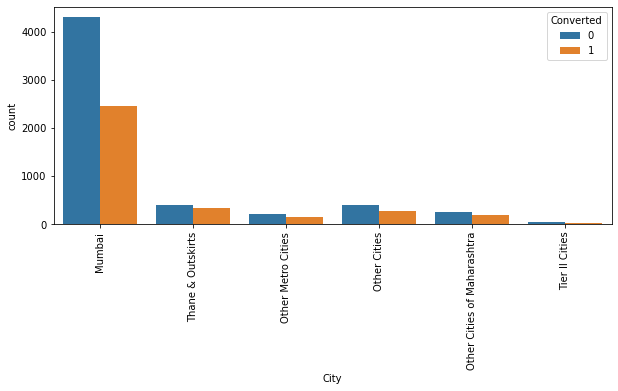

In [1305]:
# City
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['City'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

Mumbai has the highest number of leads.

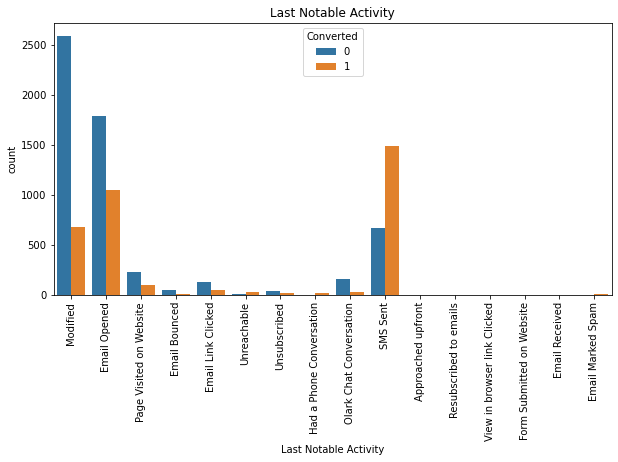

In [1306]:
# Last Notable Activity
plt.figure(figsize=(10,5))

s3=sns.countplot(df_lead['Last Notable Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Last Notable Activity')

plt.show()

There are quite a few Last Notable Activity categories that has very less number of leads (< 1%). They all can be grouped together into a new category called 'Others'.

In [1307]:
#Last Notable Activity and Last Activity seem to have similar categories and almost similar distribution, hence we can drop this column.
df_lead.drop(columns=['Last Notable Activity'],inplace=True)

#others = df_lead['Last Notable Activity'].value_counts(normalize=True)[df_lead['Last Notable Activity'].value_counts(normalize=True)<0.01].index
#df_lead['Last Notable Activity']=df_lead['Last Notable Activity'].apply(lambda x: 'Others' if x in others else x)

In [1308]:
#Lets check again plot of Last Notable Activity
#plt.figure(figsize=(10,5))

#s3=sns.countplot(df_lead['Last Notable Activity'], hue=df_lead.Converted)
#s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
#plt.title('Last Notable Activity')

#plt.show()

In [1309]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   Occupation                              9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  Lead Quality                            9074 non-null   obje

#### Visualising Numeric variables

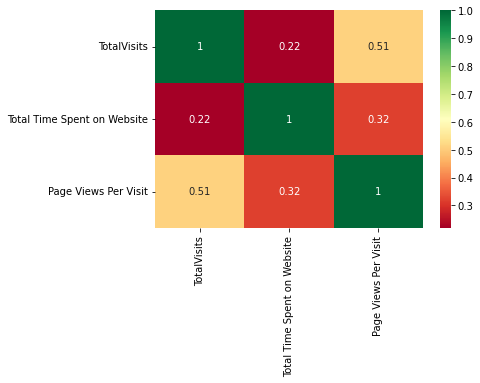

In [1310]:
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Correlation between numeric variables using heatmap
sns.heatmap(df_lead[num_cols].corr(),cmap="RdYlGn",annot = True)
plt.show()

There doesnt seem to be much correlation between these numeric variables

#### Outliers in Numeric Variables using Box Plot

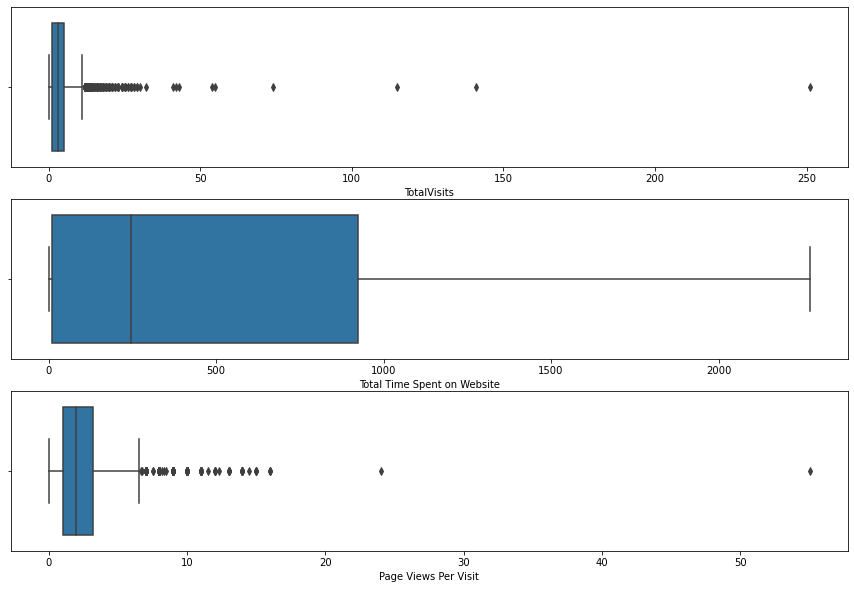

In [1311]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(num_cols):
    plt.subplot(3,1,i+1)
    sns.boxplot(df_lead[col])
plt.show()

In [1312]:
#Check the lower and higher percentiles to see how much outliers we have
df_lead[num_cols].describe([0.05, 0.25, 0.50, 0.75, 0.90, 0.95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


From the above box plots we can see that there are outliers in the upper quantiles of TotalVisits and Page Views Per Visit. <br>
Since the difference between 95th quantile and maximum values of these two columns are pretty high, we will remove those values higher than the 99th quantile.

In [1313]:
total_visit_95 = df_lead['TotalVisits'].quantile(0.95)
df_lead['TotalVisits'][df_lead['TotalVisits'] > total_visit_95] = total_visit_95

page_view_95 = df_lead['Page Views Per Visit'].quantile(0.95)
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] > page_view_95] = page_view_95


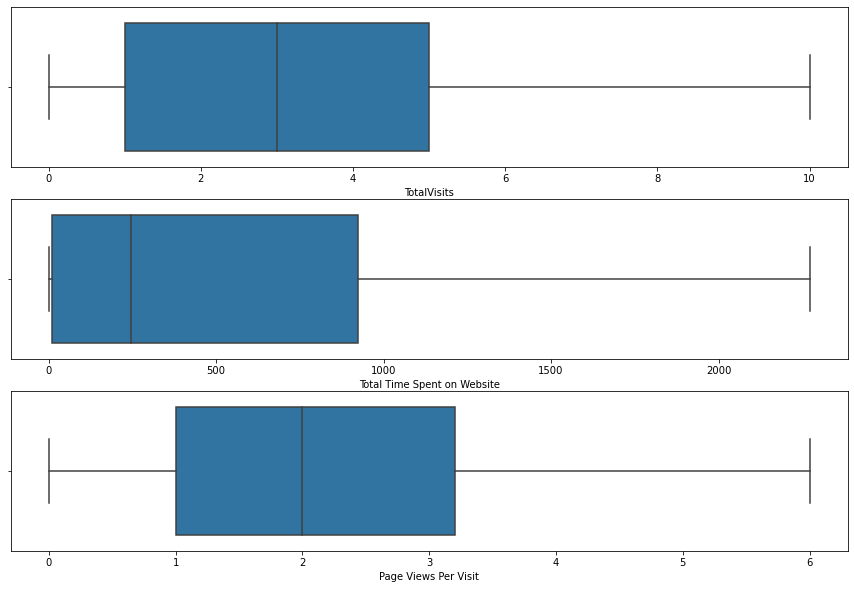

In [1314]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(num_cols):
    plt.subplot(3,1,i+1)
    sns.boxplot(df_lead[col])
plt.show()

#### Visualize Numeric varibales wrt. Target Varibale (Converted)

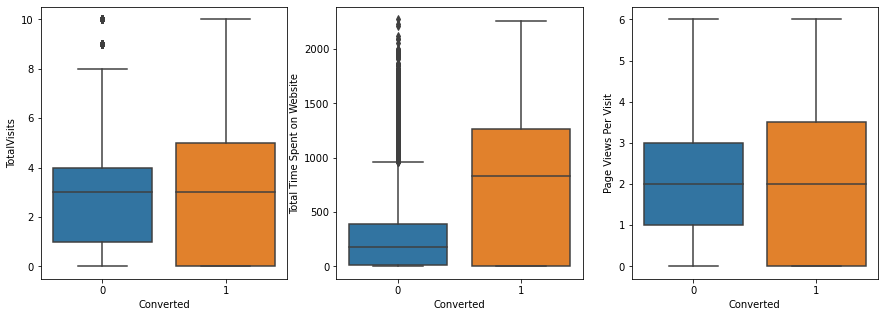

In [1315]:
#Numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for i,col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = col , x = 'Converted', data = df_lead)
plt.show()

Inferences :
1. Total Visits and Page Views Per Visit has same median. Hence we cannot infer much from these columns
2. People who spent more time on website are more likely to become converted leads

## 4. Data Preparation

#### 4.1 Converting binary features (Yes/No) to 1/0

In [1316]:
# List of columns to map
bin_cols =  ['A free copy of Mastering The Interview']

# Defining the map function to convert Yes/No to 1/0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead[bin_cols] = df_lead[bin_cols].apply(binary_map)

In [1317]:
df_lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Management,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified


#### 4.2 Dummy variables for the Categorical columns 

In [1318]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

#list of categorical columns
cat_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','Occupation','Tags','Lead Quality','City', 'Last Notable Activity']

dummy = pd.get_dummies(df_lead[cat_cols], drop_first=True)

# Adding the results to the master dataframe
df_lead = pd.concat([df_lead, dummy], axis=1)

In [1319]:
df_lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,...,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Management,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Management,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1320]:
# Drop the original columns for which we have created the dummies.
df_lead.drop(cat_cols, axis = 1, inplace = True)
df_lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,...,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1321]:
df_lead.shape

(9074, 55)

## 5. Model Building

#### 5.1 Train-Test Split

In [1322]:
# Copying feature variables to X
X = df_lead.drop('Converted', axis = 1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Travel and Tourism,...,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1323]:
# Copying target variable to y
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1324]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 5.2 Feature Scaling

In [1325]:
#Scaling the numeric features using Standard Scaling method - TotalVisits, Total Time Spent on Website and Page Views Per Visit
scaler = StandardScaler() #Craeting a scaler object
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) 

In [1326]:
X_train[num_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.351000e+03,6.351000e+03,6.351000e+03
mean,4.153503e-17,2.774246e-16,3.950723e-17
std,1.000079e+00,1.000079e+00,1.000079e+00
min,-1.150329e+00,-8.886503e-01,-1.265540e+00
25%,-7.915538e-01,-8.703028e-01,-7.102788e-01
50%,-7.400339e-02,-4.354671e-01,-1.550176e-01
75%,6.435470e-01,8.002366e-01,5.834798e-01
max,2.437423e+00,3.195502e+00,2.066027e+00


In [1327]:
### Checking the Convertion Rate
rate = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
print("The convertion rate of the data set is ", rate)

The convertion rate of the data set is  37.85541106458012


We have 37.86% convertion rate

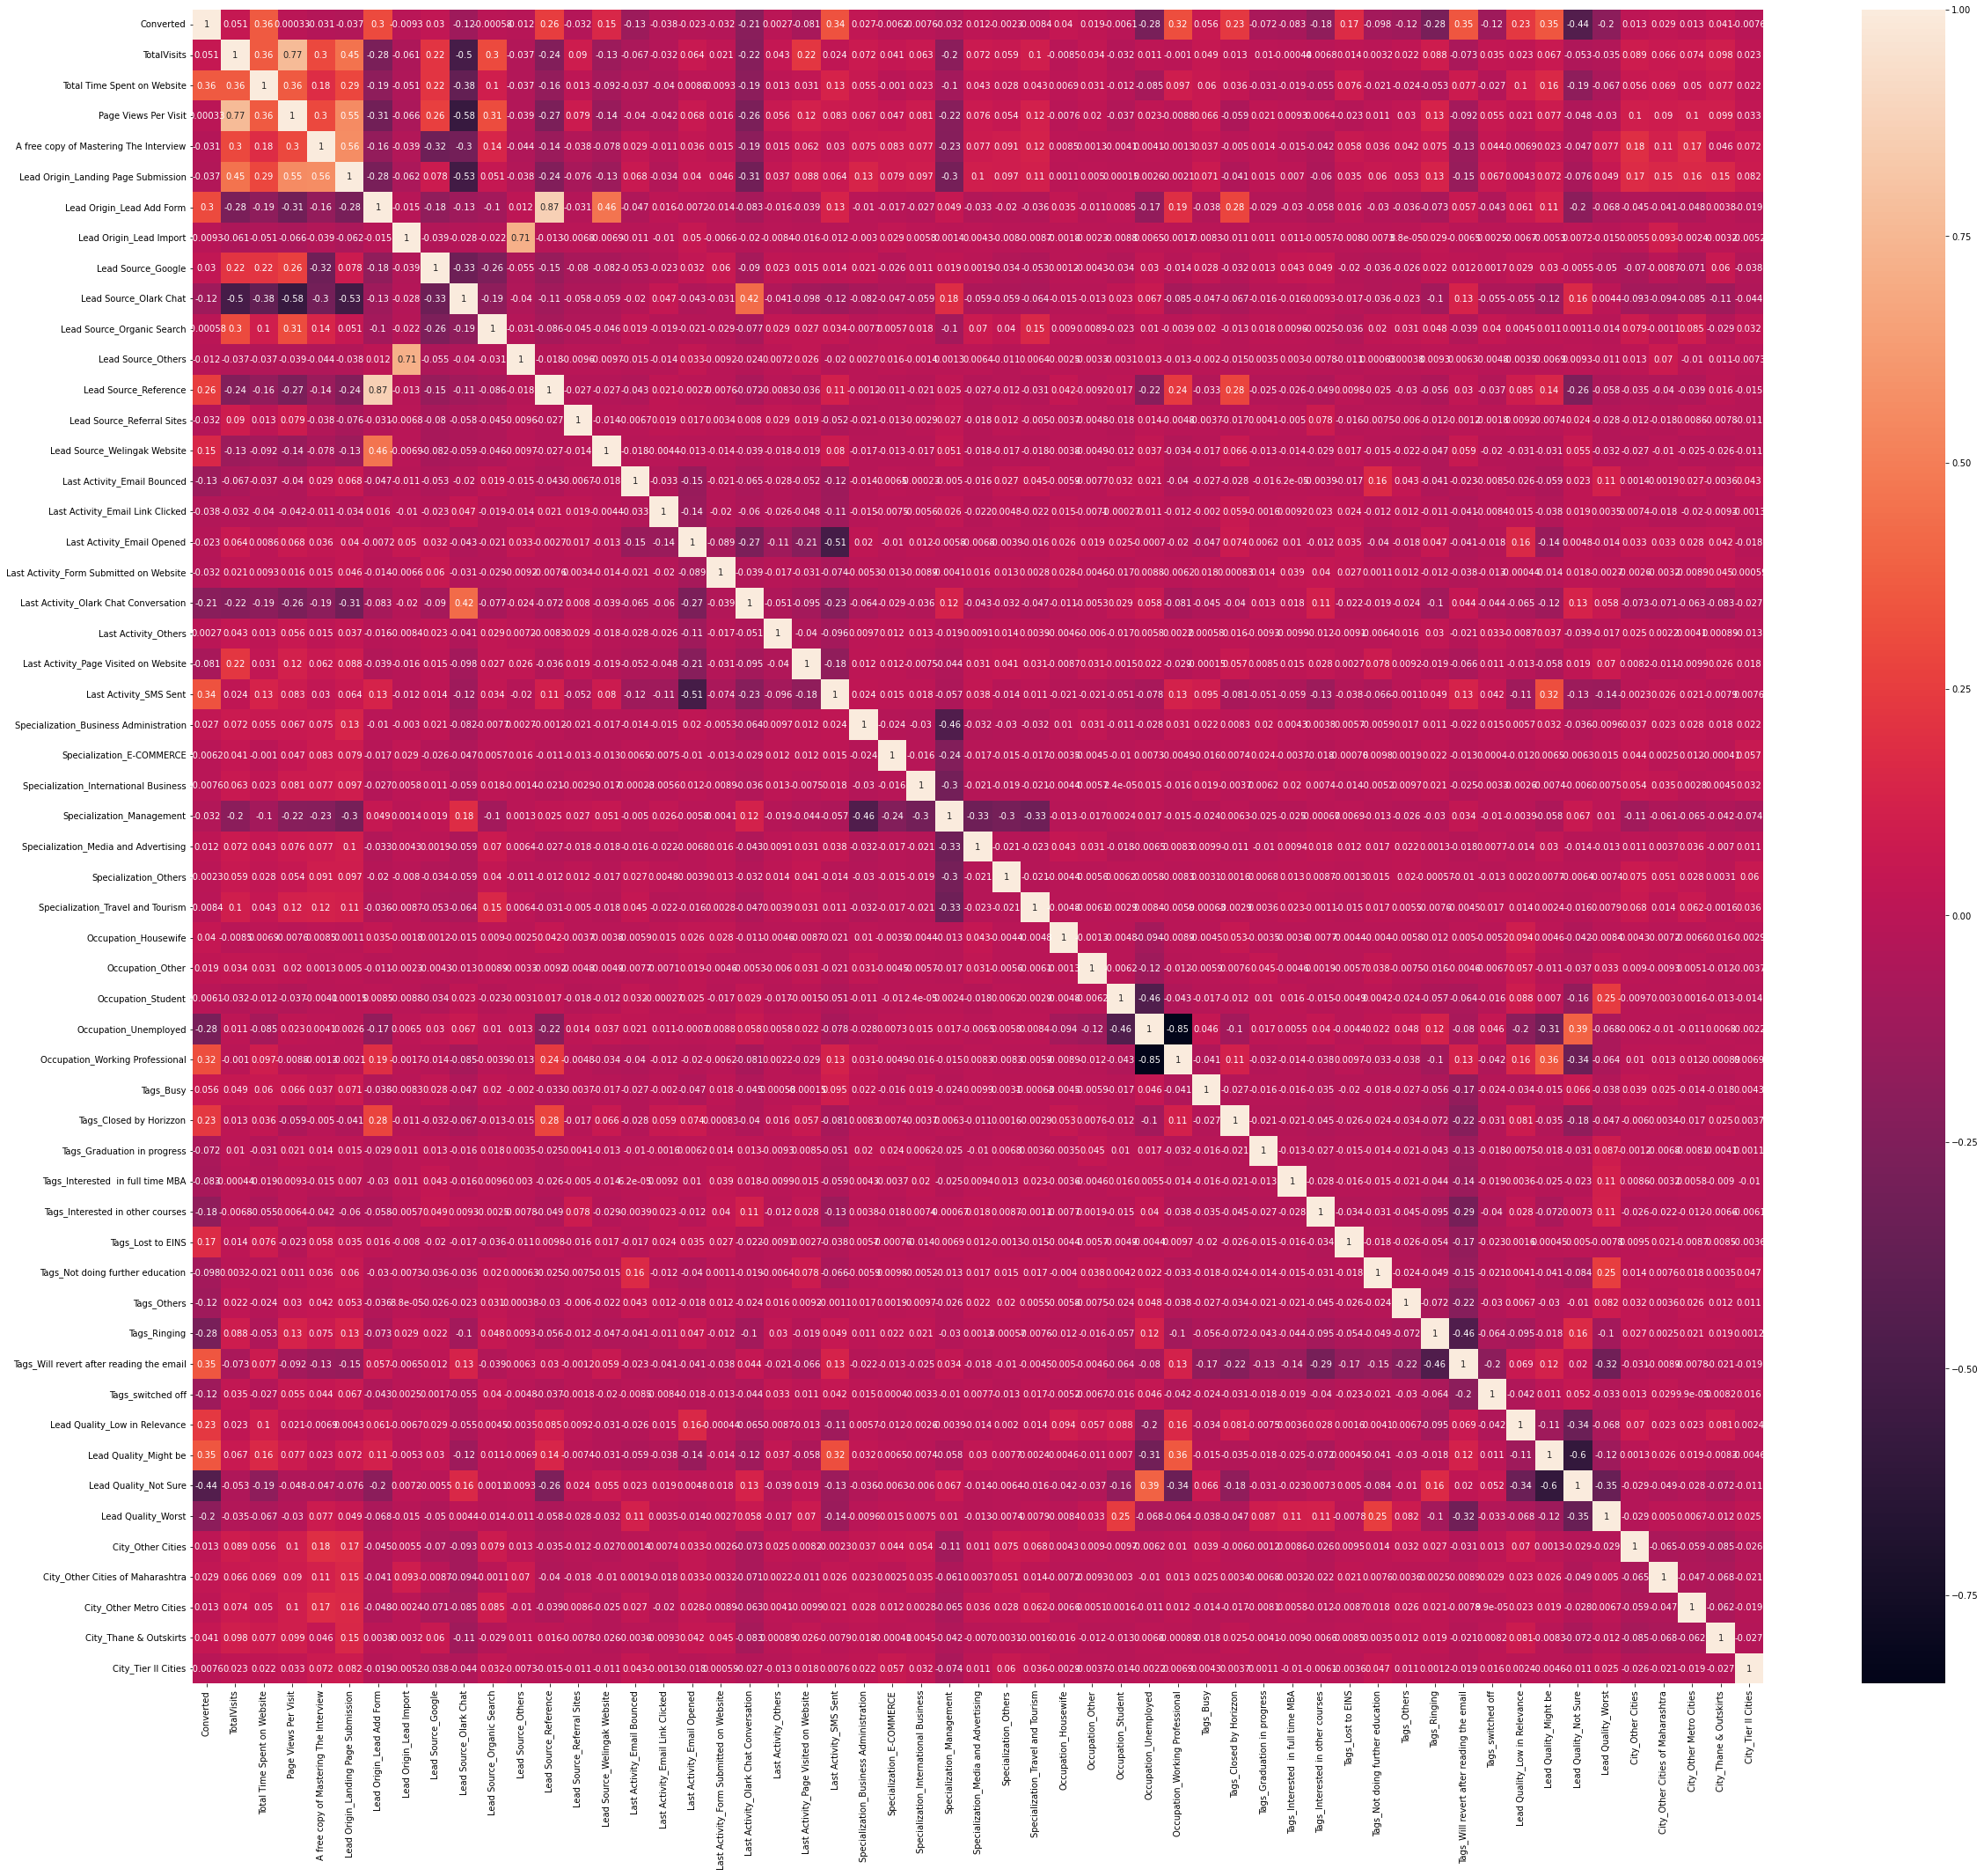

In [1328]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,35))        # Size of the figure
sns.heatmap(df_lead.corr(),annot = True)
plt.show()

In [1329]:
#Dropping highly correlated dummy variables

X_test = X_test.drop(['Lead Origin_Lead Add Form','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Occupation_Unemployed'], 1)
X_train = X_train.drop(['Lead Origin_Lead Add Form','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Occupation_Unemployed'], 1)

#### 5.3 Model Building

In [1330]:
# Function to display VIF values
def print_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [1331]:
#Lets build our first model with all the features 
# Logistic regression model - 1

# Adding a constant variable to X_train
X_train_log1 = sm.add_constant(X_train)

# Running the logistic model
logm1 = sm.GLM(y_train, X_train_log1, family = sm.families.Binomial())

#Summary of our logistic model
res1 = logm1.fit().summary()
print(res1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1380.7
Date:                Fri, 24 Feb 2023   Deviance:                       2761.4
Time:                        21:38:36   Pearson chi2:                 2.77e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5927
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## ?? Comments from the above model?

In [1332]:
# Use RFE to find top 15 features
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select = 12)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1333]:
#Display the feature ranking from RFE
df_rfe_rank = pd.DataFrame()
df_rfe_rank['Column'] = X_train.columns
df_rfe_rank['rfe_support'] = rfe.support_
df_rfe_rank['rfe_rank'] = rfe.ranking_

df_rfe_rank.sort_values(by='rfe_rank')

,Column,rfe_support,rfe_rank
40,Tags_Ringing,True,1
20,Last Activity_SMS Sent,True,1
46,Lead Quality_Worst,True,1
45,Lead Quality_Not Sure,True,1
37,Tags_Lost to EINS,True,1
32,Tags_Busy,True,1
17,Last Activity_Olark Chat Conversation,True,1
33,Tags_Closed by Horizzon,True,1
42,Tags_switched off,True,1
41,Tags_Will revert after reading the email,True,1


In [1334]:
# Columns which were supported/selected by RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


In [1335]:
#Building the second model with RFE selected features

# Creating a new data frame X_tain_rfe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable to X_train_rfe
X_train_log2 = sm.add_constant(X_train_rfe)

# Running the logistic model
log2 = sm.GLM(y_train,X_train_log2, family = sm.families.Binomial())

#Summary of our logistic model
res2 = log2.fit()
print(res2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1691.9
Date:                Fri, 24 Feb 2023   Deviance:                       3383.9
Time:                        21:38:37   Pearson chi2:                 2.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5508
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1336]:
print_vif(X_train_rfe)

                                    Features   VIF
4                                  Tags_Busy  1.11
9                          Tags_switched off  1.09
1                Last Activity_Email Bounced  1.08
0               Lead Source_Welingak Website  1.04
6                          Tags_Lost to EINS  1.04
5                    Tags_Closed by Horizzon  1.01
11                        Lead Quality_Worst  0.38
2      Last Activity_Olark Chat Conversation  0.29
3                     Last Activity_SMS Sent  0.14
10                     Lead Quality_Not Sure  0.14
8   Tags_Will revert after reading the email  0.12
7                               Tags_Ringing  0.10


## ?? 

Since the p-value of Lead Source_Olark Chat is 0.233 which is greater than 0.05, lets build our next model after dropping this feature

In [1337]:

# drop 'Lead Source_Olark Chat' from the train data set
X_train_rfe = X_train_rfe.drop('Lead Source_Olark Chat', axis = 1)

# Adding a constant variable  
X_train_log2 = sm.add_constant(X_train_rfe)
log2 = sm.GLM(y_train,X_train_log2, family = sm.families.Binomial())
res = log2.fit()
#Summary of our linear model
print(res.summary())

KeyError: "['Lead Source_Olark Chat'] not found in axis"

In [ ]:
print_vif(X_train_rfe)